### Example with two 6-hour audio file containing blue whale Dcall 

In [1]:
#Lib importation
import os
import sys
import librosa
import matplotlib.pyplot as plt
from tqdm import tqdm
import glob
import pandas as pd
import numpy as np 
from matplotlib.lines import Line2D

C:\Users\gabri.DESKTOP-QIPER28\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
#Init model name and add path
model = 'mscl_cnn14_pt'
path_model = model
sys.path.append(os.path.join(os.getcwd(),'models',path_model))
sys.path.append(os.path.join(os.getcwd(),'models','utils'))

In [3]:
#Import model as python class
from pyclass_model import Model
model = Model(os.path.join(os.getcwd(),'models'))

__________________
REQUIERMENT : 
Use model with : output = apply_model(audio)
audio (array), is a 50-second audio segment with a sampling rate at 250Hz
output is a list of float with detection results [0,1] for the following calls : 
['Bp20Hz' 'Bp20Plus' 'BpDS' 'BmA' 'BmB' 'BmZ' 'BmD']
__________________


In [4]:
#Get example audio file 
audio_path = 'data_exemple'
audio_file = glob.glob(audio_path + os.sep + '*.wav')

In [5]:
# Load audio and apply detection model
lenght_file = 50 #audio section duration (s)
sample_rate = 250 #sampling rate (Hz)

outputs = {}
for file in tqdm(audio_file):
    duration = librosa.get_duration(filename=file)
    outputs[file] = np.zeros([int(duration/lenght_file), 7])

plot_i = 0
#loop over files
for file in (audio_file):
    duration = librosa.get_duration(filename=file)
    number_of_sections = int(duration/lenght_file)
    #loop over sections
    for i in tqdm(range(number_of_sections), desc=file):
        #Load 50-second audio section and resample at 250Hz 
        audio, sr = librosa.load(file, sr=sample_rate, mono=True, offset=i*lenght_file, duration=lenght_file)
        outputs[file][i,:] = model.apply_model(audio)

data_exemple\0605.DAT.wav: 100%|██████████| 466/466 [00:13<00:00, 35.63it/s]


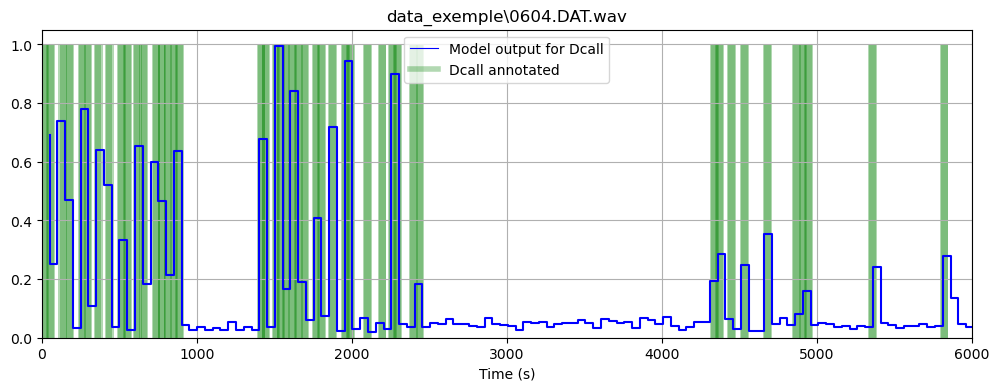

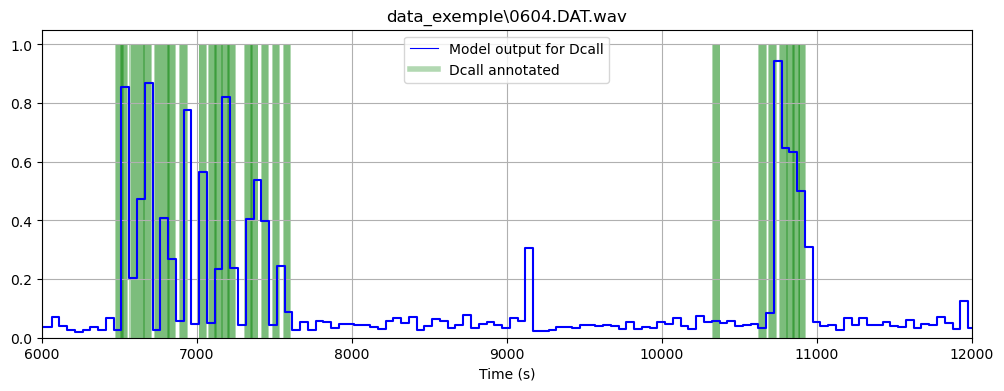

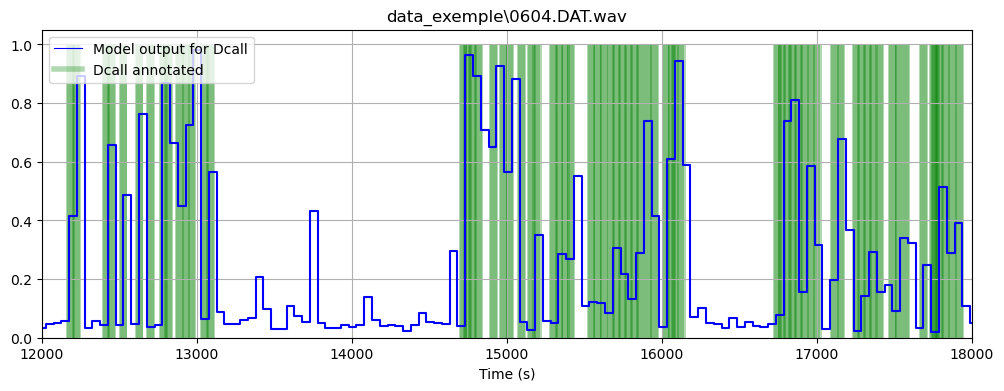

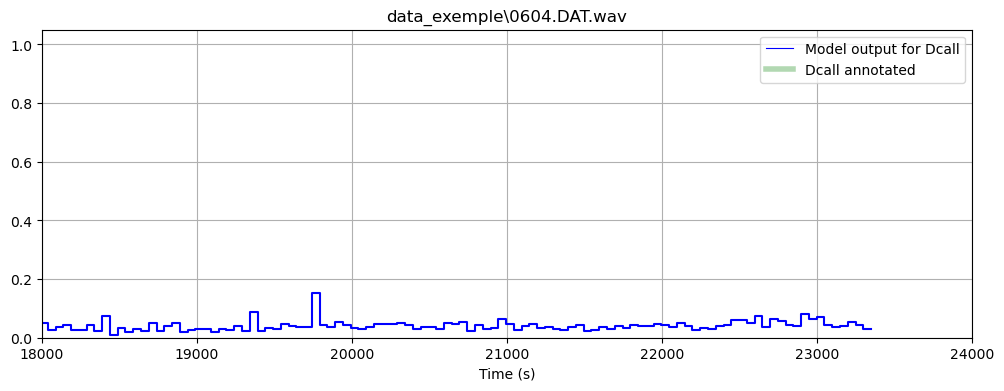

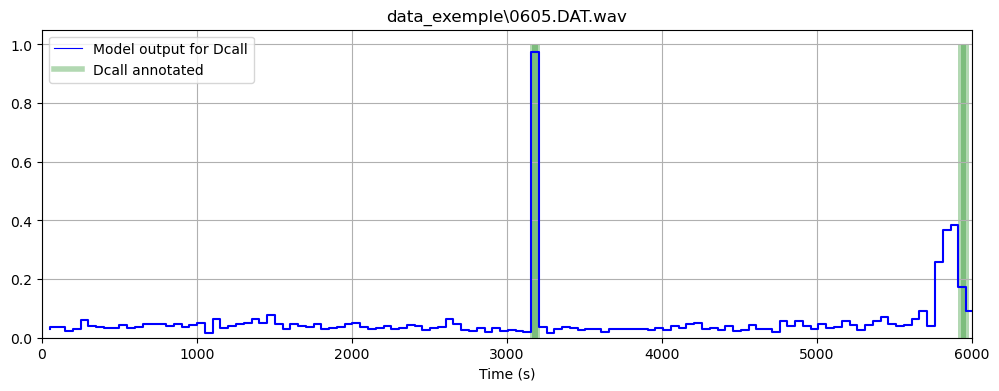

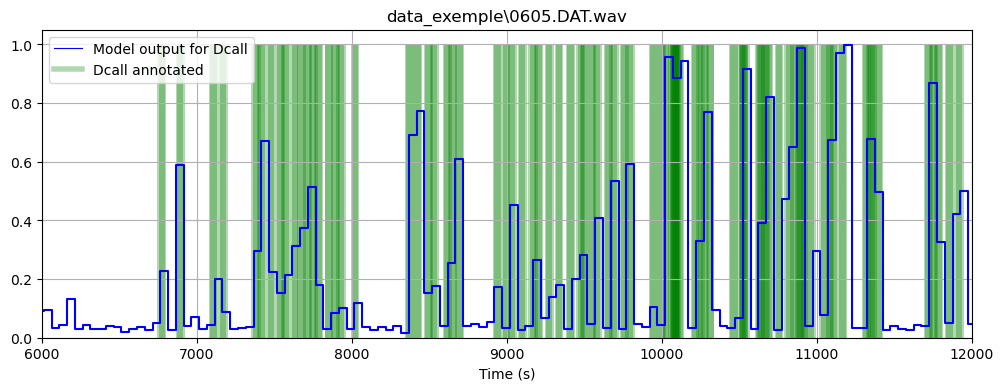

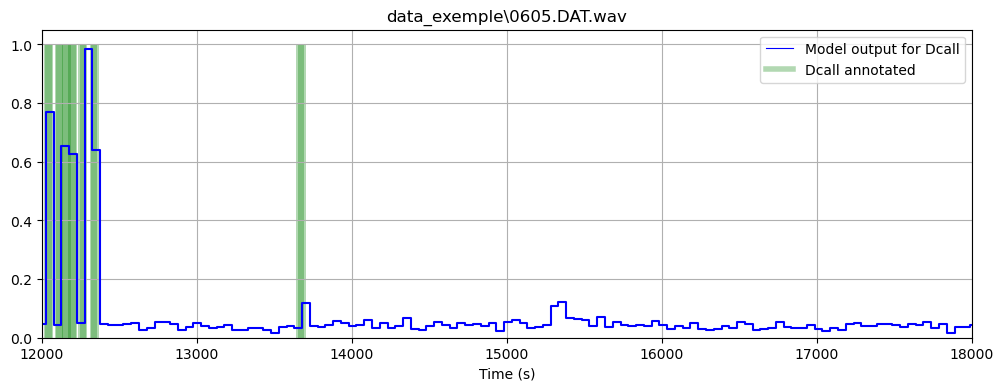

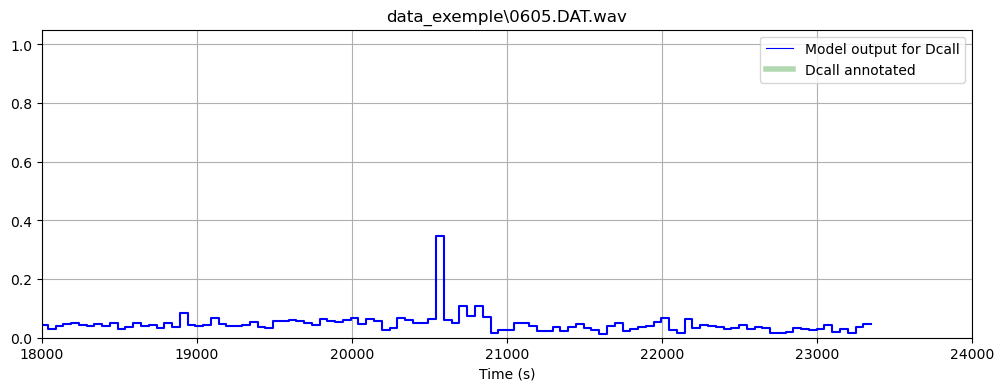

In [6]:
#Annotations
for file in audio_file:
    xl_data = pd.read_csv('data_exemple' + os.sep + os.path.basename(file)[:-4] + '.Table.1.selections.txt' , sep='\t', index_col=False)

    for min, max in [[0,6000], [6000,12000], [12000,18000], [18000,24000]]:

        plt.figure(figsize=(12,4))

        for i in range(len(xl_data)):
            start = xl_data['Begin Time (s)'][i]
            stop = xl_data['End Time (s)'][i]
            #print(start, stop)
            plt.bar(np.array([start, stop]), np.ones(2), color='g', label=str(i), width=50, alpha=0.3)

        nb_seg, _ = np.shape(outputs[file])  
        time = np.linspace(0,nb_seg * 50, nb_seg)
        plt.step(time+50, outputs[file][:,6], color='b', alpha=1)
        plt.grid()
        plt.title(file)
        plt.xlabel('Time (s)')
        #plt.legend()
        plt.xlim([min, max])

        custom_lines = [Line2D([0], [0], color='blue', lw=0.8),
                        Line2D([0], [0], color='green', alpha=0.3, lw=4)]


        plt.legend(custom_lines, ['Model output for Dcall', 'Dcall annotated'])